# 🤖 Descubriendo los Outliers: ¿Qué son y cómo los encontramos?

¡Hola, científico de datos\! 👋 Hoy vamos a embarcarnos en una aventura para encontrar y entender a unos "intrusos" muy peculiares en nuestros datos: los **outliers**. Piensa en ellos como piezas de Lego que no encajan bien en tu construcción. Son datos que se ven muy, muy diferentes al resto.

¿Por qué nos importan? Porque, así como una pieza gigante de Lego puede arruinar la casa que estás construyendo, los outliers pueden engañar a nuestros modelos de Inteligencia Artificial, haciéndoles creer cosas que no son ciertas. ¡Vamos a ver cómo los detectamos\! 🕵️‍♀️


## 🧐 Detección de Outliers: El Método Z-Score

El **Z-Score** es como una regla mágica que nos ayuda a medir qué tan "lejos" está un dato del promedio de todos los demás datos. Imagina que tienes una línea con el promedio en el centro y, a medida que te alejas de ese centro, los números son más grandes. Si un dato tiene un Z-Score muy alto, ¡significa que está muy lejos del promedio y podría ser un outlier\!

**¿Cómo funciona?**

Calculamos el Z-Score para cada dato. Si su Z-Score es más grande que un número que elegimos (¡como 1.96 o 2\!), entonces lo marcamos como un posible outlier. Es como decir: "Si esta pieza de Lego está más de 1.96 pasos lejos del promedio, ¡es rara\!".

### 📦 Preparando nuestras herramientas

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

### 🌸 Ejemplo 1: Las Flores de Iris

In [2]:
df = pd.read_csv("Dia4_Iris.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 📏 Calculando el Z-Score para `sepal_length`

Ahora, vamos a calcular el Z-Score para la columna `sepal_length`. Así sabremos qué tan "rara" es la longitud del sépalo de cada flor comparada con las demás. Usamos `np.abs` para que el Z-Score siempre sea positivo, sin importar si el valor es muy grande o muy pequeño.


In [3]:
df["z_score_sepal_length"]= np.abs((df["sepal_length"] -df["sepal_length"].mean())/df["sepal_length"].std())
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,z_score_sepal_length
0,5.1,3.5,1.4,0.2,setosa,0.897674
1,4.9,3.0,1.4,0.2,setosa,1.139200
2,4.7,3.2,1.3,0.2,setosa,1.380727
3,4.6,3.1,1.5,0.2,setosa,1.501490
4,5.0,3.6,1.4,0.2,setosa,1.018437


### 🚨 Encontrando los Outliers (¡y visualizándolos\!)


In [4]:
outliers = df[df["z_score_sepal_length"]>1.96]
outliers

,sepal_length,sepal_width,petal_length,petal_width,species,z_score_sepal_length
105,7.6,3.0,6.6,2.1,virginica,2.121409
117,7.7,3.8,6.7,2.2,virginica,2.242172
118,7.7,2.6,6.9,2.3,virginica,2.242172
122,7.7,2.8,6.7,2.0,virginica,2.242172
131,7.9,3.8,6.4,2.0,virginica,2.483699
135,7.7,3.0,6.1,2.3,virginica,2.242172


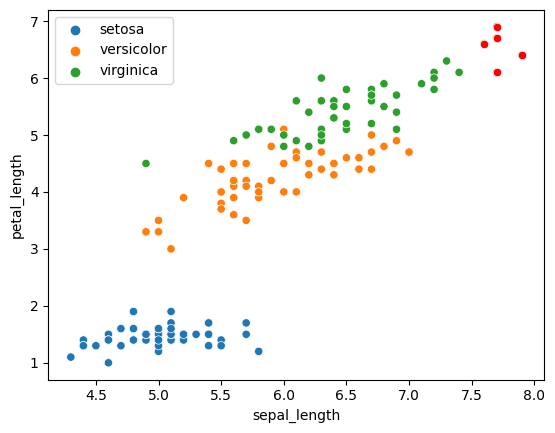

In [5]:
sns.scatterplot(df,x="sepal_length",y="petal_length", hue = "species")
sns.scatterplot(outliers,x="sepal_length",y="petal_length", c='red')
plt.show()

Se identifican los outliers fuera de la distribución en la parte superior derehca del graficos

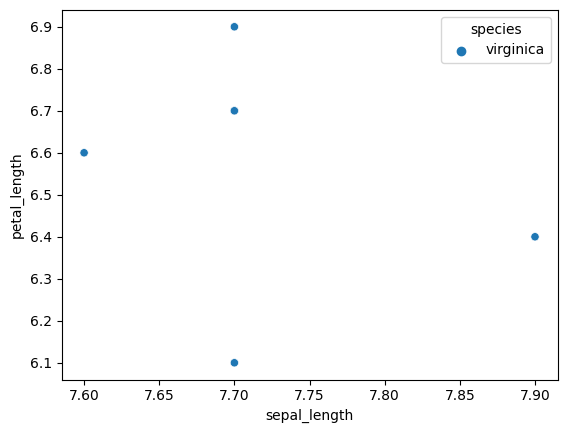

In [6]:
sns.scatterplot(outliers,x="sepal_length",y="petal_length", hue = "species")
plt.show()

### 🚢 Ejemplo 2: El Famoso Titanic

Ahora, cambiemos de historia. Vamos a ver los datos de los pasajeros del Titanic. ¿Habrá outliers en sus edades o en cuánto pagaron por el pasaje?

In [7]:
df = pd.read_csv("Dia3_Titanic.csv")
df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


### 👶 Calculando el Z-Score para `Age`

Vamos a buscar pasajeros con edades que son muy, muy diferentes al promedio. Usaremos un umbral de 2 para el Z-Score.


In [8]:
df["z_score_age"] = np.abs((df["Age"]-df["Age"].mean())/df["Age"].std())
outliers = df[df["z_score_age"]>2]
outliers

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived,z_score_age
7,8,2.00,21.0750,0,3,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,0,2.131164
11,12,58.00,26.5500,1,0,0,0,0,0,0,...,0,0,1,0,0,2.0,0,0,1,2.208158
16,17,2.00,29.1250,0,4,0,0,0,0,0,...,0,0,3,0,0,1.0,0,0,0,2.131164
33,34,66.00,10.5000,0,0,0,0,0,0,0,...,0,0,2,0,0,2.0,0,0,0,2.828062
43,44,3.00,41.5792,1,1,0,0,0,0,0,...,0,0,2,0,0,0.0,0,0,1,2.053676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,1235,58.00,512.3292,1,0,0,0,0,0,0,...,0,0,1,0,0,0.0,0,0,0,2.208158
1245,1246,0.17,20.5750,1,1,0,0,0,0,0,...,0,0,3,0,0,2.0,0,0,0,2.272967
1247,1248,59.00,51.4792,1,2,0,0,0,0,0,...,0,0,1,0,0,2.0,0,0,0,2.285646
1278,1279,57.00,13.0000,0,0,0,0,0,0,0,...,0,0,2,0,0,2.0,0,0,0,2.130670


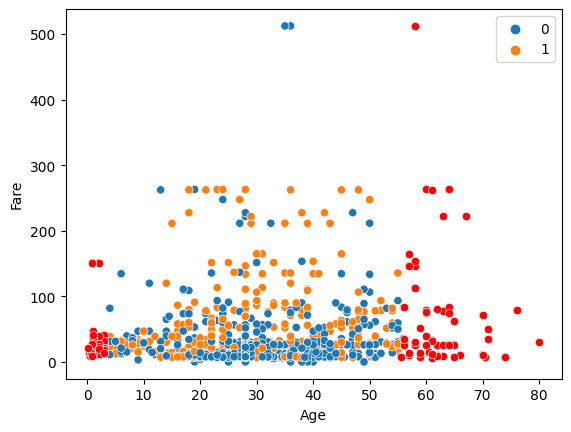

In [9]:
sns.scatterplot(df, x="Age", y ="Fare", hue = "Sex")
sns.scatterplot(outliers, x="Age", y ="Fare", c='red')
plt.show()

**💡 ¿Qué observamos?**

En este gráfico, los puntos rojos son los pasajeros que tienen edades muy por encima o por debajo de la media. Podemos ver cómo algunos de ellos pagaron tarifas muy altas o muy bajas, lo que nos da una idea de que son datos "especiales".


In [10]:
df = pd.read_csv("Dia4_Airbnb_Open_Data.csv")
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
print(df["price"].describe())

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


### 📊 Distribución de los Precios y la Magia del Logaritmo

Los datos de precios a menudo están muy "inclinados" hacia un lado (muchos precios bajos y unos pocos precios altísimos). Para que se vean más "equilibrados" y sea más fácil trabajarlos, a veces usamos una transformación matemática llamada **logaritmo** (específicamente `np.log1p` que es `log(1+x)`). Piensa en ello como si estuviéramos estirando los valores pequeños y encogiendo los valores grandes para ver mejor el patrón general.

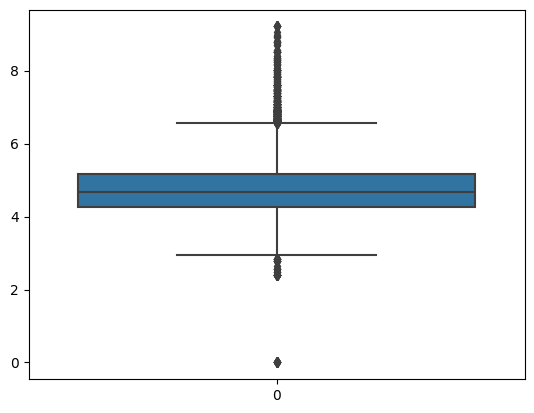

In [12]:
log_price = np.log1p(df["price"])
sns.boxplot(log_price)
plt.show()

C:\Users\JUNIORAOA\AppData\Local\Temp\ipykernel_5288\1286630314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_price)
c:\Users\JUNIORAOA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

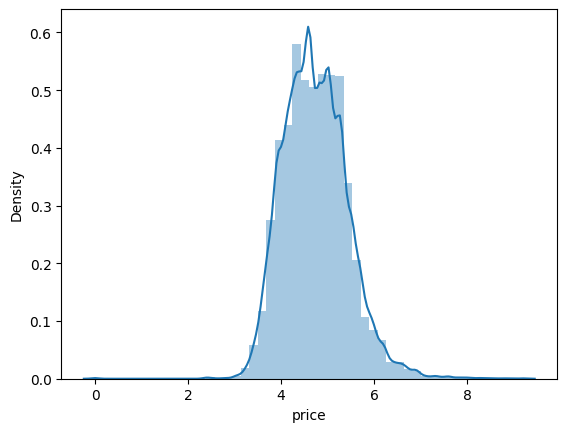

In [13]:
sns.distplot(log_price)

In [14]:
print(log_price.quantile(0.1),log_price.quantile(0.95))

3.912023005428146 5.87493073085203


In [15]:
print(log_price.skew(),df.price.skew())

0.5531045462041445 19.118938995046033


***Skew() mide que tan estrechos estan los datos hacia un lado o hacia el otro, se supone que logaritmo hace que se distribuyan mejor los datos

| Datos                 | Skew (asimetría) | ¿Qué significa?                                                         |
| --------------------- | ---------------- | ----------------------------------------------------------------------- |
| `log_price`           | 0.55             | Un poquito inclinados a la derecha (ligera cola hacia precios altos) 🟢 |
| `df.price` (original) | 19.12            | Súper mega ultra inclinados a la derecha 😱🔴 (hay precios muuuy altos) |


📈 ¿Qué aprendemos?
Que aplicar el logaritmo mejoró mucho la forma de los datos. Ahora están más equilibrados, lo cual es bueno para hacer análisis o modelos de predicción. ✅

C:\Users\JUNIORAOA\AppData\Local\Temp\ipykernel_5288\2239777731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)
c:\Users\JUNIORAOA\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

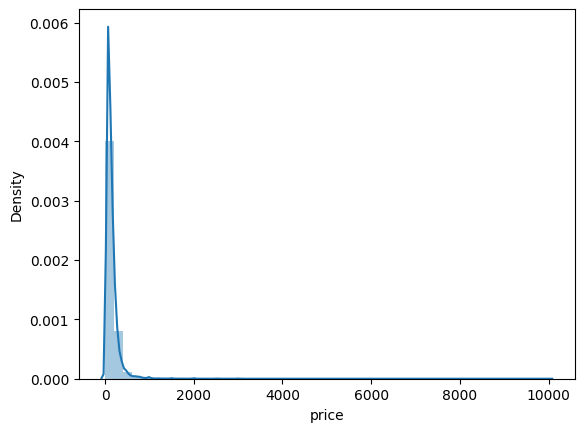

In [16]:
sns.distplot(df.price)

In [17]:
z_score = np.abs(stats.zscore(log_price))
z_score

0        0.393695
1        0.983192
2        0.403251
3        0.340950
4        0.492474
           ...   
48890    0.681978
48891    1.471678
48892    0.024025
48893    1.023292
48894    0.325058
Name: price, Length: 48895, dtype: float64

In [18]:
np.where(z_score>2)

(array([   85,   103,   158, ..., 48839, 48867, 48868], dtype=int64),)

In [19]:
df.price.mean()

152.7206871868289



### 📦 ¿Qué es el IQR?

**IQR** significa **InterQuartile Range**, o en español: **Rango Intercuartílico**.

Es una medida que te dice:

> “¿Qué tan extendidos están los datos en el centro del conjunto?”

---

### 🎯 ¿Cómo se calcula?

El IQR se calcula así:

```
IQR = Q3 - Q1
```

* **Q1 (primer cuartil)** = el valor donde está el **25%** de los datos más bajos.
* **Q3 (tercer cuartil)** = el valor donde está el **75%** de los datos más bajos.

Entonces el IQR es el **rango del 50% central** de tus datos.


### 🧐 Cuartiles y Asimetría (Skewness)
Vamos a ver los cuartiles (Q1 y Q3) de nuestros precios transformados con logaritmo y también la asimetría (`skew()`).


In [20]:
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)

IQR= q3-q1
IQR

106.0

📊 ¿Para qué sirve el IQR?
Te ayuda a detectar outliers (valores raros o extremos) de esta forma:

In [21]:
minimum = q1-1.5*IQR
minimum

-90.0

🧠 ¿Qué significa ese -90.0?
Significa que, según la regla del IQR, cualquier precio menor a -90.0 sería considerado un outlier inferior (demasiado bajo).
Esto probablemente indica que:

Tus datos no tienen precios tan bajos, o

Tu distribución está muy sesgada hacia valores altos, lo cual empuja ese mínimo hacia abajo.

In [22]:
maximum = q3+1.5*IQR
maximum

334.0

# 🧹Eliminar Datos Atípicos (Outliers)

Una vez que identificamos a nuestros "intrusos" (outliers), tenemos que decidir qué hacer con ellos. Es como si el robot constructor de casas encontrara una pieza gigante de Lego que no encaja: ¿la ignora, la corta, la transforma, o la quita del todo?

Aquí vamos a ver cómo "limpiamos" nuestros datos para que los modelos no se confundan.

### 📊 Visualizando la Distribución Original

Primero, veamos cómo se ven nuestros datos de precios antes de cualquier limpieza. Un **histograma** nos muestra cuántos datos hay en cada rango, y un **boxplot** es excelente para ver los cuartiles y los outliers.


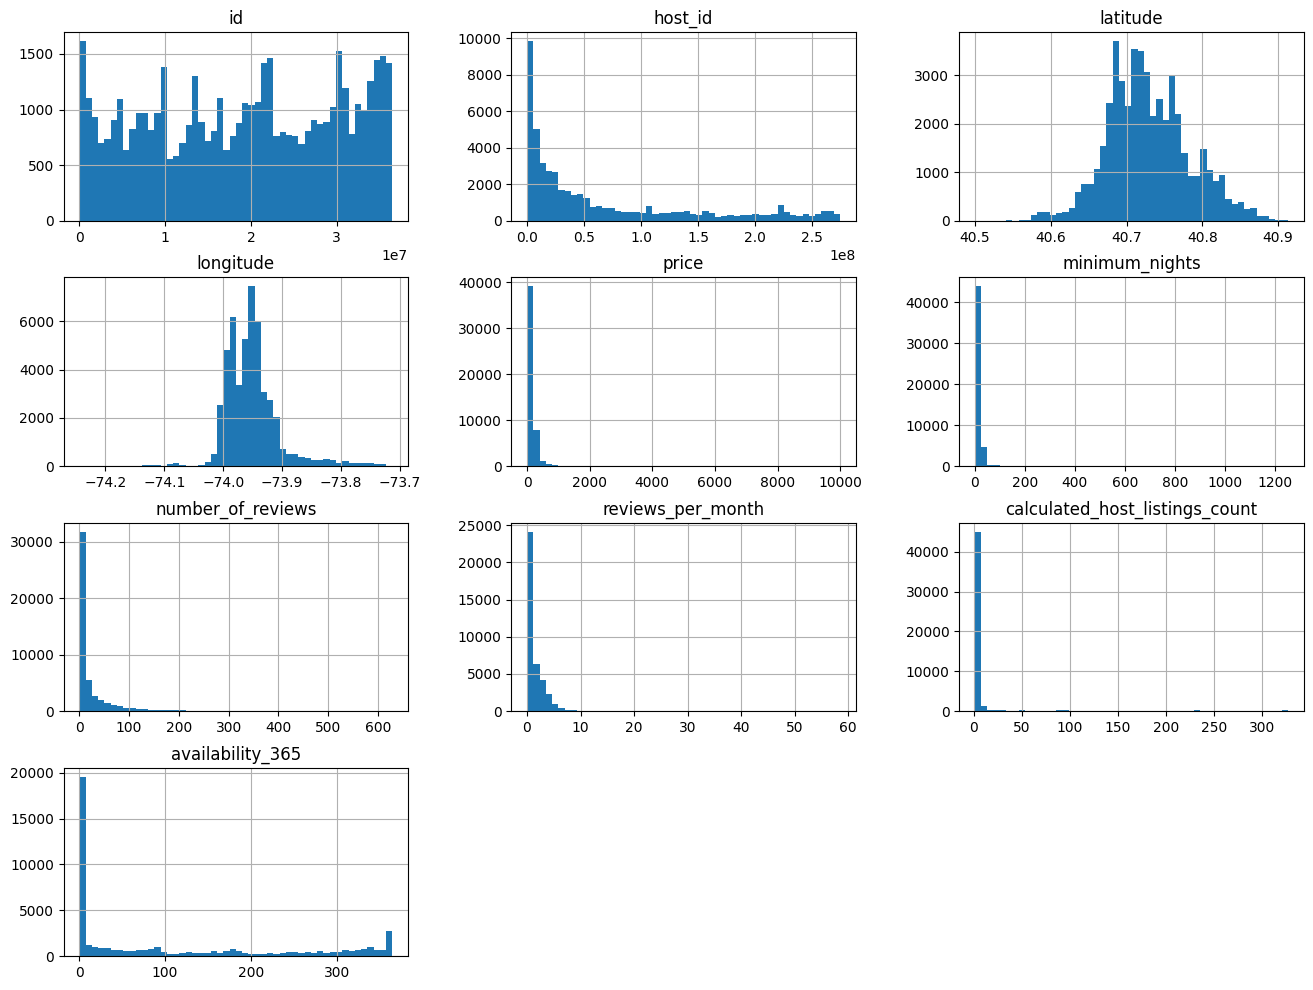

In [23]:
df.hist(bins=50, figsize=(16,12))
plt.show()

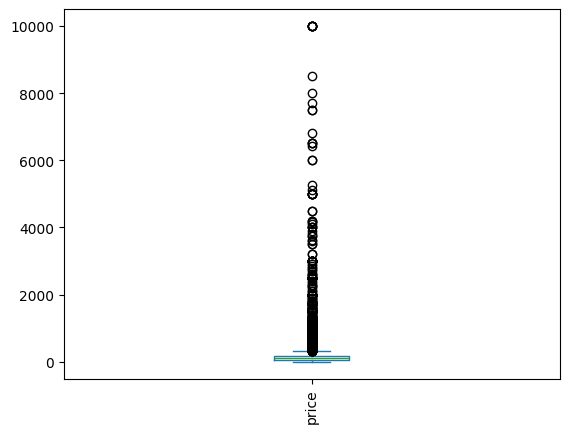

In [24]:
df.price.plot(kind="box")
plt.xticks(rotation=90)
plt.show()

**💡 ¿Qué observamos?**

El boxplot del precio es muy alargado hacia arriba, con muchísimos puntos "lejos" del cuadro principal. ¡Esos son los outliers que el IQR nos ayudaba a identificar\!

In [25]:
df.shape

(48895, 16)

### ✂️ Eliminando Outliers con la Regla del IQR

Una de las formas más directas de tratar con outliers es simplemente **eliminarlos**. Usaremos la función que define los límites con IQR y nos quedaremos solo con los datos que están "dentro de la valla". A veces, repetimos este proceso varias veces porque al eliminar los más extremos, la distribución de los datos restantes puede cambiar un poco, y podemos encontrar nuevos outliers.

In [26]:
def eliminar_atipicos(df, columns):
    df_sin_atipicos = df.copy()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3-q1
        limite_inferior = q1-1.5*IQR
        limite_superior = q3+1.5*IQR
        
        df_sin_atipicos = df_sin_atipicos[(df_sin_atipicos[col]>= limite_inferior) & (df_sin_atipicos[col]<= limite_superior)]
        
    return df_sin_atipicos

for i in range(10):
    df = eliminar_atipicos(df, ['price'])
    print(i,df.shape)

0 (45923, 16)
1 (45538, 16)
2 (44670, 16)
3 (44342, 16)
4 (44342, 16)
5 (44342, 16)
6 (44342, 16)
7 (44342, 16)
8 (44342, 16)
9 (44342, 16)


**💡 ¿Qué pasó?**

Al principio, teníamos casi 49,000 filas. Después de varias iteraciones de eliminar los outliers de precio, nos quedamos con unas 44,342 filas. ¡Esto significa que hemos eliminado muchos datos que eran extremadamente altos o bajos\!


### 📊 Visualizando los Precios Después de la Limpieza

Ahora, veamos cómo se ve el boxplot de los precios después de eliminar los outliers.


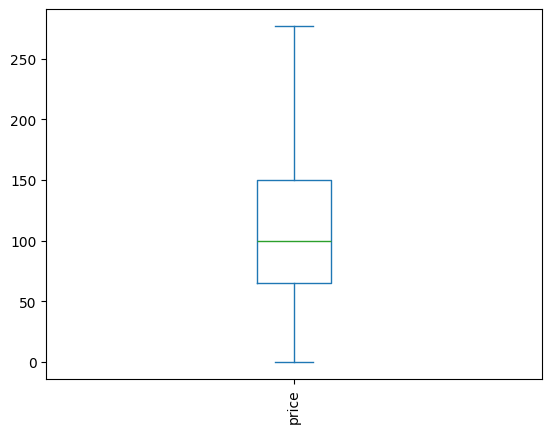

In [27]:
df.price.plot(kind="box")
plt.xticks(rotation=90)
plt.show()

**🎉 ¡Transformación completa\!**

Mira el nuevo boxplot: ¡se ve mucho más "apretado" y los puntos extremos han desaparecido\! Esto significa que ahora tenemos un conjunto de datos de precios mucho más "normal" y representativo, lo que es genial para nuestro robot constructor de casas (nuestro modelo de IA).


## 💥 Impacto de los Outliers en Correlaciones y Modelos

¡Ahora viene la parte más importante\! Ya sabemos qué son los outliers y cómo detectarlos. Pero, ¿por qué es tan crucial encontrarlos y tratarlos?

Los **outliers** (esos datos que son muy, muy diferentes al resto) impactan de forma **negativa** en las correlaciones y en el comportamiento de nuestros modelos de Inteligencia Artificial. Imagina que son como piezas de un rompecabezas que no encajan bien.

**¿Cómo afectan a las correlaciones?**

Imagina que tienes muchos bloques de Lego pequeños, la mayoría rojos y azules. Si observas que, en general, cuando un bloque rojo es un poco más grande, el azul con el que se empareja también lo es, esto es una **correlación positiva**. Nos dice que el tamaño de los bloques rojos y azules está relacionado.

Pero, ¿qué pasa si de repente aparece un bloque rojo *gigante* y un bloque azul *gigante*? ¡Estos son nuestros outliers\! Aunque la mayoría de los bloques son pequeños, la presencia de esos dos bloques enormes hará que "pensemos" (o que nuestro modelo de IA "piense") que la relación entre rojos y azules es mucho más fuerte o diferente de lo que realmente es para la mayoría de los bloques. Esos puntos extremos **distorsionan** la verdadera relación, ¡como si nos estuvieran engañando\!


**¿Cómo afectan a los modelos (IA)?**

Ahora, piensa en tu modelo de IA como un robot constructor que aprende a hacer casas con esos bloques.

1.  **Confusión y Sesgo:** Si le enseñas a tu robot solo con bloques normales, aprenderá a construir casas equilibradas. Pero si introduces esos bloques gigantes y de un tamaño muy diferente, el robot puede **confundirse**. Podría empezar a creer que todas las casas necesitan un bloque inmenso, o que las dimensiones deben ser muy desproporcionadas. Esto genera **sesgo**: el modelo se inclina demasiado hacia esos datos extremos que no representan la realidad general, tomando decisiones basadas en ellos cuando no es lo correcto.

2.  **Predicciones y Clasificaciones Incorrectas:** Si tu modelo está **desbalanceado** por la influencia de los outliers, sus predicciones o clasificaciones futuras serán menos precisas. Intentará "adivinar" basándose en la información distorsionada, lo que lleva a resultados erróneos. Es como si el robot, después de ver los bloques gigantes, construyera una casa con una puerta enorme y ventanas diminutas, porque sus "datos de entrenamiento" le hicieron creer que así debían ser.

En resumen, los outliers pueden **engañar** a tu modelo, haciendo que vea patrones o relaciones que no son representativos de la mayoría de tus datos, lo que lleva a un rendimiento deficiente.

# Técnicas de tratamiento (winsorización)

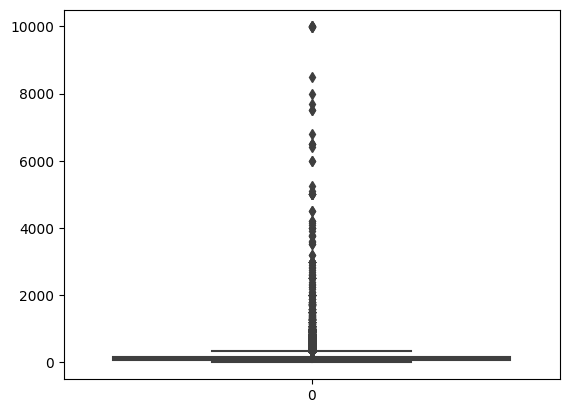

In [28]:
from scipy.stats.mstats import winsorize

#Precio viviendas
df = pd.read_csv("Dia4_Airbnb_Open_Data.csv")
sns.boxplot(df.price)
plt.show()

In [29]:
#Aplicar winzorisación 
df_win = winsorize(df.price, limits=(0.05, 0.05))
print(df.price)
print(df_win)

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64
[149 225 150 ... 115  55  90]


<Axes: >

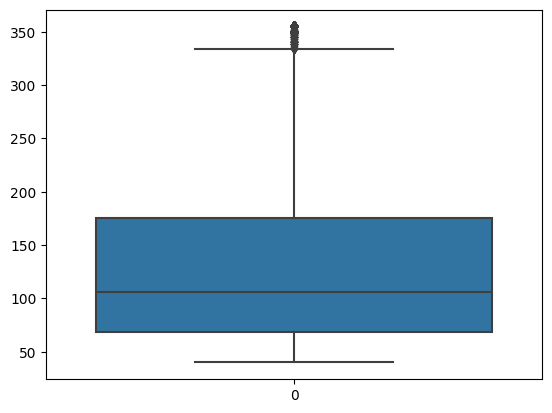

In [30]:
sns.boxplot(df_win)

Acortamos el %5 porciento más pequeño y 5% más grande de los datos